# 导入工具包

In [1]:
import random

import numpy as np
import pandas as pd
import json

from collections import Counter
import re
import jieba

import matplotlib.pyplot as plt
%matplotlib inline

# 导入数据

In [5]:
path = './sqlResult_1558435.csv'
data = pd.read_csv(path, encoding='gb18030')
data.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


### 数据基本信息

In [15]:
# content有2000多行是空值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89611 entries, 0 to 89610
Data columns (total 7 columns):
id         89611 non-null int64
author     79396 non-null object
source     89609 non-null object
content    87054 non-null object
feature    89611 non-null object
title      89577 non-null object
url        87144 non-null object
dtypes: int64(1), object(6)
memory usage: 4.8+ MB


### 取出content内容，转为list

In [16]:
articles = data['content'].tolist()

In [17]:
type(data['content'])

pandas.core.series.Series

In [18]:
type(articles)

list

In [19]:
len(articles)

89611

# 数据处理

In [20]:
articles[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [22]:
# 结巴分词后统计词频
with_jieba_cut = Counter(jieba.cut(articles[0]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\杨羊\AppData\Local\Temp\jieba.cache
Loading model cost 0.962 seconds.
Prefix dict has been built succesfully.


In [24]:
# 取词频最高的前10项，基本都是标点符号和换行符
with_jieba_cut.most_common()[:10]

[('，', 9),
 ('。', 4),
 ('MIUI', 3),
 (' ', 3),
 ('\r\n', 3),
 ('（', 2),
 ('6', 2),
 ('月', 2),
 ('）', 2),
 ('机型', 2)]

### 清洗数据，移除标点、括号、和换行符

In [31]:
def token(string):
    return re.findall('\w+', string)

In [30]:
tokenized = token(articles[0])

In [31]:
tokenized

['此外',
 '自本周',
 '6月12日',
 '起',
 '除小米手机6等15款机型外',
 '其余机型已暂停更新发布',
 '含开发版',
 '体验版内测',
 '稳定版暂不受影响',
 '以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI',
 '9的研发之中',
 'MIUI',
 '8去年5月发布',
 '距今已有一年有余',
 '也是时候更新换代了',
 '当然',
 '关于MIUI',
 '9的确切信息',
 '我们还是等待官方消息']

In [32]:
''.join(tokenized)

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [34]:
articles_clean = [''.join(token(str(article))) for article in articles]

In [35]:
len(articles_clean)

89611

### 保存清洗后的数据

In [36]:
with open('articles_clean.txt', 'w') as f:
    for article in articles_clean:
        f.write(article + '\n')

### 从保存的文件中重新读取数据，对数据进行分词处理

In [2]:
def cut(string):
    return list(jieba.cut(string))

In [3]:
def get_tokens_from_file(file_name='articles_clean.txt'):
    tokens = []
    for i, line in enumerate(open(file_name)):
        if i % 2000 == 0:
            print(i)
        tokens += cut(line)
    return tokens

In [4]:
tokens = get_tokens_from_file()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\杨羊\AppData\Local\Temp\jieba.cache


0


Loading model cost 1.090 seconds.
Prefix dict has been built succesfully.


2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000


In [5]:
# 词的总数
len(tokens)

17618254

In [6]:
tokens[-10:]

['不过', '一天', '留不住', '算不出', '流年', '她', '写道', '完', 'n', '\n']

### 使用json.dumps方法，保存分词后的结果

In [7]:
token_dump = json.dumps(tokens)

In [10]:
type(token_dump)

str

In [11]:
token_dump[:20]

'["\\u6b64\\u5916", "\\u'

In [12]:
with open("tokens.txt", "w") as f:
    f.write(token_dump)

In [2]:
# 重新读取tokens的方法
def reload_tokens(file_name='tokens.txt'):
    f=open(file_name)
    tokens = f.read()
    tokens = json.loads(tokens)
    # print(len(tokens))
    # print(tokens[-10:])
    f.close()
    return tokens

In [3]:
tokens = reload_tokens()

### 统计词频

In [4]:
words_count = Counter(tokens)

In [5]:
words_count.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

In [18]:
frequency = [f for w, f in words_count.most_common(100)]

In [19]:
frequency[:10]

[703716,
 382020,
 263597,
 189330,
 166300,
 142462,
 134061,
 123106,
 121938,
 100909]

### 打印词频统计图

In [20]:
# x轴，0到99
x = [i for i in range(100)]

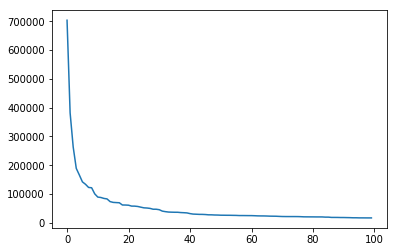

In [21]:
plt.plot(x, frequency)

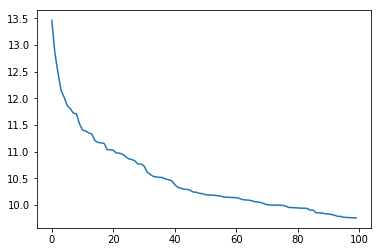

In [22]:
# 对词频进行log变换后的统计图
plt.plot(x, np.log(frequency))

### 拼接生成2-gram数据

In [6]:
tokens_2_gram = [''.join(tokens[i:i+2]) for i in range(len(tokens[:-2]))]

In [7]:
tokens_2_gram[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

### 统计2-gram词频

In [8]:
words_count_2 = Counter(tokens_2_gram)

In [9]:
words_count_2.most_common(10)

[('\n新华社', 69033),
 ('2017年', 61480),
 ('外代二线', 61301),
 ('n新华社', 59794),
 ('日n', 52216),
 ('新华社照片', 50401),
 ('5月', 37977),
 ('4月', 34571),
 ('新华社记者', 30864),
 ('２０', 27166)]

# 语言模型

### 获取单个词的概率

In [10]:
# P(word) = #word / total
# 如果word在语料库中不存在，则返回默认值 1 / total，避免整句最终概率的乘积(或条件概率的分母)为0
def prob(word):
    if word in words_count:
        return words_count[word] / len(tokens)
    else:
        return 1 / len(tokens)

### 获取2-gram的概率

In [11]:
# p(w1w2) = #w1w2 / total_2_gram
# 使用 p(w2|w1) = p(w1w2) / p(w1)
# 如果w1w2在语料库中不存在，则返回默认值 1 / total_2_gram，避免整句最终概率的乘积为0
def prob_2(w1, w2):
    combine = w1 + w2
    if combine in words_count_2:
        return words_count_2[combine] / len(tokens_2_gram) / prob(w1)
    else:
        return 1 / len(tokens_2_gram)

### 获取整句出现的概率

In [12]:
# 使用 p(w1w2w3w4) = p(w1) * p(w2|w1) * p(w3|w2) * p(w4|w3)
# 也可以用 p(w1w2w3w4) = p(w1|w2) * p(w2|w3) * p(w3|w4) * p(w4), prob_2要改为p(w1|w2) = p(w1w2) / p(w2)
def get_sentence_prob(sentence):
    # 去除句子中的标点和换行
    sentence = ''.join(token(str(sentence)))
    if not sentence:
        return 0
    # 分词
    words = cut(sentence)
    probability = prob(words[0])
    
    for i,w1 in enumerate(words[:-1]):
        w2 = words[i + 1]
        p_w1_w2 = prob_2(w1, w2)
        probability *= p_w1_w2
        
    return probability

### 简单测试

In [72]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_sentence_prob(s1), get_sentence_prob(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 2.3041256555278797e-45
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 2.597567430798574e-46
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.9028284759936606e-32
---- 真是一只好看的小猫 with probility 4.180581754133704e-25
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 2.73118258875878e-17
---- 今晚火锅去吃我 with probility 4.7399940123249173e-26
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.2413800500048002e-24
---- 养乐多绿来一杯 with probility 1.8285696112865008e-22


# 语句生成

使用课上例子的方式，根据语法直接生成一批语句，对每个句子计算出现概率，从中选取top-k（或根据分位数选取），  
最后使用randome.choice从结果中随机选取一句返回。  
  
优点：增加了最终结果的随机性  
缺点：生成过程没有考虑每个词的概率；最终选择的句子不一定是最佳的

In [40]:
def generate_grammar(grammar_str: str, target, split = '=>'):
    generated_grammar = {}
    for line in grammar_str.split('\n'):
        if not line:
            continue
        expression, formula = line.split(split)
        
        formulas = formula.split('|')
        
        formulas = [f.split() for f in formulas]
        
        generated_grammar[expression.strip()] = formulas
        
    return generated_grammar

In [15]:
def generate_by_grammar(grammar: dict, target: str):
    if target not in grammar:
        return target
    expr = random.choice(grammar[target])
    
    return ''.join(generate_by_grammar(grammar, t) for t in expr)

In [16]:
def generate_by_str(grammar_str, split, target):
    grammar = generate_grammar(grammar_str, target, split)
    return generate_by_grammar(grammar, target)

In [19]:
def generate_sentence(grammar_str, split, target, rounds=10, top_k=3):
    '''
    grammar_str: 语法结构字符串，
    split: expression和content的分隔符，
    target: 语法开头标记，
    rounds：随机生成候选语句的数目，
    top_k：生成最终语句随机选取范围的大小
    '''
    # 随机生成语句
    sentences = []
    for i in range(rounds):
        sentence = generate_by_str(grammar_str, split, target)
        # 计算语句概率，将语句和对应概率加入列表
        probability = get_sentence_prob(sentence)
        sentences.append((sentence, probability))
    
    # 按概率大小排序
    sentences = sorted(sentences, key = lambda s : s[1])
    
    # 选取top-k
    if top_k < rounds:
        sentences = sentences[:top_k]
    
    # 随机选取一个句子进行返回
    return random.choice(sentences)

In [21]:
def token(string):
    return re.findall('\w+', string)

In [23]:
def cut(string):
    return list(jieba.cut(string))

In [48]:
host = """
host = 寒暄 ， 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要 | 您想
业务相关 = 动作 具体业务
动作 = 玩玩 | 试试 | 看看
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [50]:
generate_sentence(host, split='=', target='host', rounds=10, top_k= 5)

('您好，我是96号,您需要试试打猎吗？', 1.0646710519622669e-57)

# 关于 if...else... 和 lambda表达式

python中的lambda即为匿名函数，其表达式形式为：  
```python
lambda [argument_list] : expression
``` 
argument_list 为调用该函数需要传入的参数，可以为空（即无参数）  
expression 为函数内容，即要对返回内容进行的处理
  
例如：  
```python
add = lambda x,y : x + y

        与
    
def add(x,y): return x + y

的调用方式和返回结果一致:

z = add(3, 4) # z = 7
```

在下面的例子中，num 方法随机返回0到4中的一个数字。  
- numbers_1 使用了 if else 和阈值(随机数是否大于等于0.5)来控制是否要再次递归调用自身；  
- numbers_2 使用了 lambda 表达式  
首先定义了两个不需要参数的匿名函数，  
第一个直接返回空字符串，第二个调用 num 返回一个数字，并对自身进行递归调用，  
之后使用 random.choice 从两个匿名函数中随机选取一个，  
choice函数后的括号表示执行被选取的匿名函数，  
最终返回调用结果  

numbers_1 和 numbers_2 最终产生的效果一致。

In [13]:
def num():
    return random.choice("0|1|2|3|4".split("|"))

In [33]:
def numbers_1():
    if random.random() < 0.5:
        return num()
    else:
        return num() + numbers()

In [45]:
def numbers_2():
    return random.choice([lambda : '', lambda : num() + numbers_2()])()

In [58]:
numbers_1()

'42'

In [78]:
numbers_2()

'1434'

如果numbers_2最后缺少括号，将会直接返回该匿名函数

In [79]:
def numbers_3():
    return random.choice([lambda : '', lambda : num() + numbers_2()])

In [80]:
numbers_3()

<function __main__.numbers_3.<locals>.<lambda>()>

In [82]:
numbers_3()()

'134'